In [6]:
#importing all the necessary libraries
import numpy as np
import sympy
import matplotlib.pyplot as plt 
import numpy.polynomial.legendre as leg #for finding the legendre nodes
import numpy.linalg as lin
from sympy import Symbol #for generating the polynomials
from sympy import simplify #for simplifying the resulting polynomials
from sympy import integrate #for evaluating two norm
#from sympy import diff #for differentiating
#from sympy import solveset #for solving linear equation
from sympy import *
from tqdm import tqdm
from numpy import random
import math
import time

In [3]:
def compute_lag(x_nodes,x,i): 
    M = len(x)
    N = len(x_nodes)
    y = np.ones(M)
    ones = np.ones(M)
    for j in range(N):
        if(j!=i):
            y = np.multiply((x-x_nodes[j])*ones/(x_nodes[i]-x_nodes[j]),y) #performs an element wise product
    return y

#function takes the function values at the nodes, nodes and evaluates the lagrange interpolant 
def interp_poly(f_nodes,x_nodes,x): #function to calculate interpolant
    M = len(x)
    N = len(x_nodes)
    f = np.zeros(M)
    for i in range(N):
        f += f_nodes[i]*compute_lag(x_nodes,x,i)
    
    return f



  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

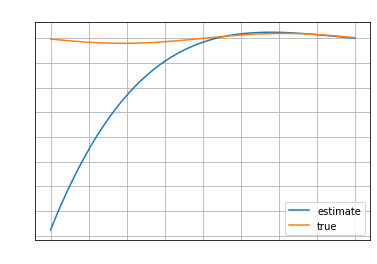

 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  5.23it/s]

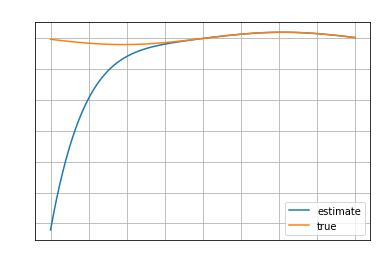

 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  5.78it/s]

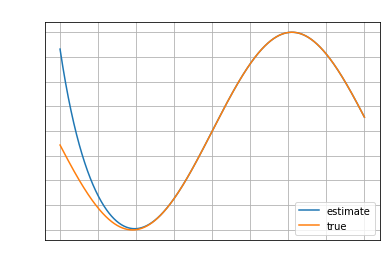

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00,  6.12it/s]

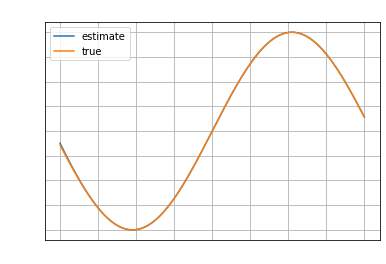

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00,  6.37it/s]

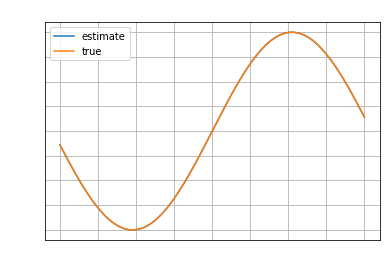

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.59it/s]


In [4]:
# Question 1: Fredholm integral

def K(x,t): #the function K(x,t)
    
    return 3*(0.5*math.sin(3*x) - t*x**2)

N = np.asarray(np.linspace(5,25,5),dtype = int) #number of nodes

x_interval = np.linspace(-1,1,1000) #interval we're checking the error at
f_true = [math.sin(3*i) for i in x_interval]
err = []
error_order = []

for n in tqdm(N): #parsing through different values for the number of nodes
    
    l,w = leg.leggauss(n) #obtaining the nodes and the weights
    
    x   = (math.pi/2)*(1+l) #transformation to obtain x nodes 
    
    A   = np.zeros((n,n)) #initialising A matrix
    b   = np.zeros(n) #initialising B matrix
    
    #filling A matrix and b matrix
    for i in range(n):
        b[i] = math.pi*x[i]**2
        for j in range(n):
            A[i][j] = -(math.pi/2)*w[j]*K(x[i],x[j])
            if(i==j):
                A[i][j] += 1
                
    
    phi  = lin.solve(A,b)
    
    f_est = interp_poly(phi,x,x_interval)
    plt.plot(x_interval,f_est,label='estimate')
    plt.plot(x_interval,f_true,label='true')
    plt.grid()
    plt.title(f'Estimated using {n} nodes',color = 'white')
    plt.legend()
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    plt.show()
    err.append(max(abs(f_true - f_est)))
    
    

    
    
                
    

            
    

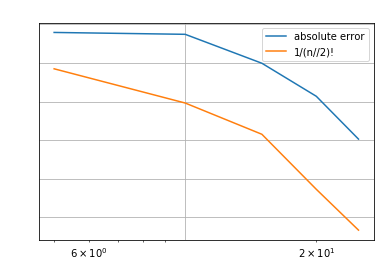

In [5]:
plt.loglog(N,err,label = 'absolute error')
plt.loglog(N,[1/math.factorial(n//2) for n in N],label = '1/(n//2)!')
plt.grid()
plt.title('Behaviour of the absolute error', color = 'white')
plt.legend()
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 256.49it/s]


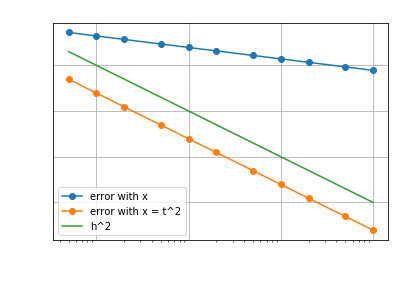

In [137]:
#Question 2: Rectangular Rule

true_value = 1.4936482656248540508 #true value of the integral obtained from wolfram alpha

N = [5,10,20,50,100,200,500,1000,2000,5000,10000] #number of panels


err_x = [] #error without any variable change
err_t = [] #error with substitution
h_vals = [] #h
for n in tqdm(N):
    x = np.linspace(0,1,n+1) #nodes for n panels
    h = 1/(n) #h
    h_vals.append(h)
    y = (x[:-1]+x[1:])/2 #y_i  
    RR = 0
    RR_t = 0
    for i in range(len(y)):
        RR += h*((math.e**(-y[i]))/math.sqrt(y[i])) #RR without any substitution
        RR_t += 2*h*((math.e**(-y[i]**2)))        #RR with substitution
        
    err_x.append(np.abs(RR-true_value)) 
    err_t.append(np.abs(RR_t - true_value))
    

#plotting all the errors in a log log plot
plt.loglog(N,err_x,'o-',label = 'error with x')
plt.loglog(N,err_t,'o-',label = 'error with x = t^2')
plt.loglog(N,np.asarray(h_vals)**2,label = "h^2")

plt.title("Loglog plot of the Absolute Error using Rectangular Rule",color = "white")
plt.grid(True)
plt.legend()
plt.ylabel(" |Error|",color = "white")
plt.xlabel("<-N->",color = "white")
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()       
    
    
    

In [7]:
#comparing computational time between the two methods
x = np.linspace(0,1,10001) #nodes for 10000 panels
h = 1/(10000) #h
y = (x[:-1]+x[1:])/2 #y_i 

startTime = time.time()
RR = 0
for i in range(len(y)):
    RR += h*((math.e**(-y[i]))/math.sqrt(y[i])) #RR without any substitution
endTime = time.time()
print(f'Time taken without substitution = {endTime - startTime}')

startTime = time.time()
RR_t = 0
for i in range(len(y)):
    RR_t += 2*h*((math.e**(-y[i]**2)))        #RR with substitution
endTime = time.time()
print(f'Time taken with substitution = {endTime - startTime}')

Time taken without substitution = 0.011966943740844727
Time taken with substitution = 0.010973453521728516


In [23]:
# Question 5: Root finding

def f(x,a=-0.1): #the function
    return x*np.e**x - a
def df(x):
    return (x+1)*np.e**x
#bisection method
epsilon = 1e-5 #tolerance
n_steps = 0

#function value at starting point are of opposite sign
a = -1 #a_0
b = 0 #b_0
r = (a+b)/2 
print(f'Bisection method with starting points {a},{b}')
while((abs(f(r))>epsilon)and((b-a)>epsilon)):
    if(f(r)*f(a) > 0):
        a = r
    else:
        b = r
    
    r = (a+b)/2 #new guess
    n_steps += 1
    
    print(f'Estimate at step {n_steps} is {r}')
    

#newton's method
n_steps = 0 #reinitializing n_steps
g = -5 #our guess (shouldn't land on -1)
print(f'Newton method with starting points {g}')

while(abs(f(g)) > epsilon):
    g -= f(g)/(df(g)) #new guess
    n_steps += 1
    
    print(f'Estimate at step {n_steps} is {g}')
    

#secant method
n_steps = 0 #reinitializing n_steps
x_1 = 0 #first point
x_2 = -2 #second point
print(f'Secant method with starting points {x_1},{x_2}')
while(abs(f(x_2))>epsilon):
    x_1,x_2 = x_2,(x_2-f(x_2)*((x_2-x_1)/(f(x_2)-f(x_1)))) #update step
    n_steps += 1
    
    print(f'Estimate at step {n_steps} is {x_2}')
  

    



Bisection method with starting points -1,0
Estimate at step 1 is -0.25
Estimate at step 2 is -0.125
Estimate at step 3 is -0.0625
Estimate at step 4 is -0.09375
Estimate at step 5 is -0.109375
Estimate at step 6 is -0.1171875
Estimate at step 7 is -0.11328125
Estimate at step 8 is -0.111328125
Estimate at step 9 is -0.1123046875
Estimate at step 10 is -0.11181640625
Estimate at step 11 is -0.112060546875
Estimate at step 12 is -0.1119384765625
Estimate at step 13 is -0.11187744140625
Estimate at step 14 is -0.111846923828125
Estimate at step 15 is -0.1118316650390625
Newton method with starting points -5
Estimate at step 1 is -2.539671022435586
Estimate at step 2 is -3.365900113544329
Estimate at step 3 is -3.5645327038276275
Estimate at step 4 is -3.5771035619400413
Secant method with starting points 0,-2
Estimate at step 1 is -0.7389056098930651
Estimate at step 2 is -4.616556552585879
Estimate at step 3 is -3.9306210052027537
Estimate at step 4 is -3.4336796109571908
Estimate at ste